# Model
## Prepare Data

In [369]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [370]:
features_filtered["Signal"] = y
features_filtered

,"Close__fft_coefficient__attr_""abs""__coeff_8","Open__fft_coefficient__attr_""abs""__coeff_8","Close__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",Open__time_reversal_asymmetry_statistic__lag_2,"Low__fft_coefficient__attr_""abs""__coeff_8","Close__fft_coefficient__attr_""abs""__coeff_77","High__fft_coefficient__attr_""abs""__coeff_8","Open__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","Close__fft_coefficient__attr_""abs""__coeff_9","Close__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",...,pvr_1h,pvt_1h,atr_1h,massi_1h,natr_1h,pdist_1h,rvi_1h,true_range_1h,ui_1h,Signal
1,0.025173,0.019282,0.000017,1.120082e-10,0.018433,0.015561,0.020456,0.000015,0.033452,0.000016,...,2.0,1.120777e+05,0.089935,23.888011,0.089935,0.500000,78.298970,0.071429,0.949848,0
2,0.027645,0.024743,-0.000128,-1.655072e-09,0.029262,0.063929,0.026581,0.000019,0.016536,0.000018,...,1.0,3.217259e+06,0.043994,27.941065,0.039851,0.195122,60.049549,-0.078431,1.198276,0
3,0.097952,0.097848,0.000003,1.489567e-07,0.099890,0.079549,0.105300,0.000061,0.050563,0.000078,...,3.0,-7.547686e+06,0.052630,27.839936,0.075122,1.461538,60.431281,1.500000,1.357485,0
4,0.079002,0.073262,-0.000059,1.805896e-07,0.068182,0.218195,0.081098,0.000067,0.054259,0.000071,...,3.0,1.498906e+07,0.056029,25.668623,0.083977,-0.157895,64.213403,0.666667,2.765895,0
5,0.011948,0.012573,0.000051,2.452577e-08,0.005004,0.038104,0.026740,0.000035,0.066697,0.000035,...,2.0,1.996005e+08,-0.043785,25.332876,-0.046282,-0.222222,48.106505,-0.500000,2.459982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.054252,0.053628,0.000356,4.513117e-08,0.038030,0.099610,0.062078,0.000053,0.024424,0.000051,...,1.0,2.467890e+09,0.032179,25.313792,0.016911,1.290780,60.995930,2.080000,1.308526,1
568,0.063140,0.063244,0.000369,4.557885e-09,0.062615,0.051681,0.069387,0.000030,0.030721,0.000037,...,1.0,3.133532e+08,0.097127,27.898363,0.043694,3.447853,46.628815,4.146552,2.307550,0
569,0.069970,0.085123,0.000478,8.217633e-09,0.052260,0.129587,0.093118,0.000104,0.130834,0.000093,...,1.0,8.767011e+08,0.110751,25.682154,0.041315,1.775000,44.519228,2.798817,7.456411,0
570,0.034097,0.075156,0.000434,-3.480053e-08,0.063712,0.081296,0.039088,0.000063,0.063256,0.000059,...,2.0,6.175397e+08,0.012233,26.136251,0.006171,0.215139,68.513471,-0.236842,1.531669,1


In [371]:
# fix null values
features_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
#extracted_features.fillna(0, inplace=True)
features_filtered

,"Close__fft_coefficient__attr_""abs""__coeff_8","Open__fft_coefficient__attr_""abs""__coeff_8","Close__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",Open__time_reversal_asymmetry_statistic__lag_2,"Low__fft_coefficient__attr_""abs""__coeff_8","Close__fft_coefficient__attr_""abs""__coeff_77","High__fft_coefficient__attr_""abs""__coeff_8","Open__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""","Close__fft_coefficient__attr_""abs""__coeff_9","Close__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""mean""",...,pvr_1h,pvt_1h,atr_1h,massi_1h,natr_1h,pdist_1h,rvi_1h,true_range_1h,ui_1h,Signal
1,0.025173,0.019282,0.000017,1.120082e-10,0.018433,0.015561,0.020456,0.000015,0.033452,0.000016,...,2.0,1.120777e+05,0.089935,23.888011,0.089935,0.500000,78.298970,0.071429,0.949848,0
2,0.027645,0.024743,-0.000128,-1.655072e-09,0.029262,0.063929,0.026581,0.000019,0.016536,0.000018,...,1.0,3.217259e+06,0.043994,27.941065,0.039851,0.195122,60.049549,-0.078431,1.198276,0
3,0.097952,0.097848,0.000003,1.489567e-07,0.099890,0.079549,0.105300,0.000061,0.050563,0.000078,...,3.0,-7.547686e+06,0.052630,27.839936,0.075122,1.461538,60.431281,1.500000,1.357485,0
4,0.079002,0.073262,-0.000059,1.805896e-07,0.068182,0.218195,0.081098,0.000067,0.054259,0.000071,...,3.0,1.498906e+07,0.056029,25.668623,0.083977,-0.157895,64.213403,0.666667,2.765895,0
5,0.011948,0.012573,0.000051,2.452577e-08,0.005004,0.038104,0.026740,0.000035,0.066697,0.000035,...,2.0,1.996005e+08,-0.043785,25.332876,-0.046282,-0.222222,48.106505,-0.500000,2.459982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.054252,0.053628,0.000356,4.513117e-08,0.038030,0.099610,0.062078,0.000053,0.024424,0.000051,...,1.0,2.467890e+09,0.032179,25.313792,0.016911,1.290780,60.995930,2.080000,1.308526,1
568,0.063140,0.063244,0.000369,4.557885e-09,0.062615,0.051681,0.069387,0.000030,0.030721,0.000037,...,1.0,3.133532e+08,0.097127,27.898363,0.043694,3.447853,46.628815,4.146552,2.307550,0
569,0.069970,0.085123,0.000478,8.217633e-09,0.052260,0.129587,0.093118,0.000104,0.130834,0.000093,...,1.0,8.767011e+08,0.110751,25.682154,0.041315,1.775000,44.519228,2.798817,7.456411,0
570,0.034097,0.075156,0.000434,-3.480053e-08,0.063712,0.081296,0.039088,0.000063,0.063256,0.000059,...,2.0,6.175397e+08,0.012233,26.136251,0.006171,0.215139,68.513471,-0.236842,1.531669,1


See how imbalanced the data is

In [372]:
sum(y)/len(y)

0.30998248686514884

We see that the data is imbalanced by 28%, which is something we need to handle.

In [373]:
X = features_filtered.drop("Signal", axis=1)
y = features_filtered["Signal"]

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [375]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Pipeline
#num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
#                        ('std_scaler', StandardScaler())])              # scale values

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median"))])

X_train_prepared = num_pipeline.fit_transform(X_train)
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=X_train.columns)

Now let's verify that `stratify` worked.

In [376]:
sum(y_train)/len(y_train)

0.3092105263157895

In [377]:
sum(y_test)/len(y_test)

0.3130434782608696

In [241]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()

Looks like it worked!

### Random Forest

In [421]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_prepared_df, y_train)
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared_df, y_train, cv=3, method="predict_proba")

## CV Scores
forest_scores = cross_val_score(forest_clf, X_train_prepared_df, y_train, cv=3)
print(forest_scores.mean())

0.7324561403508772


In [422]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid()

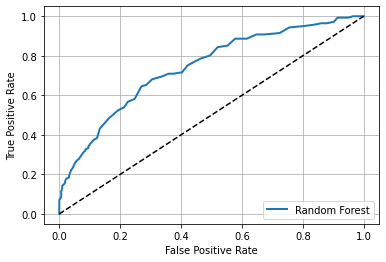

In [423]:
y_scores_forest = y_probas_forest[:,1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [424]:
roc_auc_score(y_train, y_scores_forest)

0.7404593042890916

### AdaBoost

In [425]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_scores = cross_val_score(ada_clf, X_train_prepared_df, y_train, cv=3)
ada_scores.mean()

0.7171052631578947

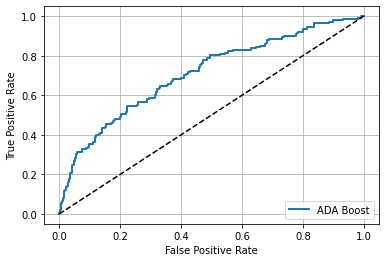

In [426]:
y_probas_ada = cross_val_predict(ada_clf, X_train_prepared_df, y_train, cv=3, method="predict_proba")
y_scores_ada = y_probas_ada[:,1] # score = probability of positive class
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_train, y_scores_ada)
plot_roc_curve(fpr_ada, tpr_ada, "ADA Boost")
plt.legend(loc="lower right")
plt.show()

In [427]:
roc_auc_score(y_train, y_scores_ada)

0.7095800968141392

In [428]:
from sklearn.metrics import confusion_matrix
y_train_pred_ada = cross_val_predict(ada_clf, X_train_prepared_df, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_ada)

array([[263,  52],
       [ 77,  64]])

In [429]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred_ada)

0.49805447470817127

In [430]:
ada_clf.fit(X_train_prepared_df, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [431]:
def feature_importances(clf, thresh):
    ## most important features
    important_features = []
    for i, x in enumerate(clf.feature_importances_):
        if x >= thresh:
            important_features.append([x, X_train.columns[i]])

    return important_features

important_features = feature_importances(ada_clf, 0.02)
important_features

[[0.02, 'High__fft_coefficient__attr_"abs"__coeff_65'],
 [0.02, 'Low__fft_coefficient__attr_"abs"__coeff_25'],
 [0.03, 'Volume__fft_coefficient__attr_"imag"__coeff_72'],
 [0.02, 'Low__fft_coefficient__attr_"abs"__coeff_3'],
 [0.02, 'High__partial_autocorrelation__lag_7'],
 [0.02, 'High__fft_coefficient__attr_"abs"__coeff_94'],
 [0.03, 'High__fft_coefficient__attr_"real"__coeff_61'],
 [0.02, 'Close__energy_ratio_by_chunks__num_segments_10__segment_focus_5'],
 [0.02, 'Low__fft_coefficient__attr_"abs"__coeff_61'],
 [0.02, 'Close__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8'],
 [0.02, 'Volume__fft_coefficient__attr_"angle"__coeff_43'],
 [0.02, 'High__fft_coefficient__attr_"abs"__coeff_36'],
 [0.03, 'Close__fft_coefficient__attr_"abs"__coeff_97'],
 [0.02, 'pdist_1h']]

### Gradient Boosting

In [432]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train_prepared_df, y_train)

y_probas_gb = cross_val_predict(gb_clf, X_train_prepared_df, y_train, cv=3, method="predict_proba")

## CV Scores
gb_scores = cross_val_score(forest_clf, X_train_prepared_df, y_train, cv=3)
print(gb_scores.mean())

0.7324561403508772


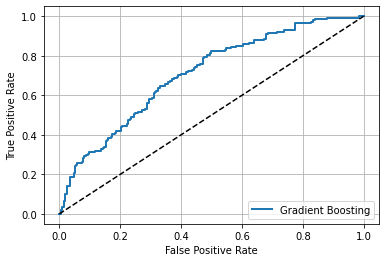

In [433]:
y_scores_gb = y_probas_gb[:,1] # score = probability of positive class
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, y_scores_gb)
plot_roc_curve(fpr_gb, tpr_gb, "Gradient Boosting")
plt.legend(loc="lower right")
plt.show()

In [434]:
roc_auc_score(y_train, y_scores_gb)

0.7070133963750985

In [435]:
y_train_pred_gb = cross_val_predict(gb_clf, X_train_prepared_df, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_gb)

array([[244,  71],
       [ 74,  67]])

In [436]:
f1_score(y_train, y_train_pred_gb)

0.48028673835125446

In [189]:
important_features = feature_importances(gb_clf, 0.02)
sorted(important_features)

[[0.020189733420009185, 'hwma'],
 [0.020465063968912723, 'vosc'],
 [0.022042791113402634, 'High__fft_coefficient__attr_"abs"__coeff_94'],
 [0.02270733565321102, 'kurtosis_1h'],
 [0.022923462951919247, 'zscore_1h'],
 [0.026673483917797534, 'High__fft_coefficient__attr_"abs"__coeff_93'],
 [0.028616654017697484, 'vwap_1h'],
 [0.03227926751408077, 'cmf_1h'],
 [0.03665650885868991, 'Volume__linear_trend__attr_"pvalue"'],
 [0.03914931532229604, 'Volume__fft_coefficient__attr_"real"__coeff_85'],
 [0.042231352911077095, 'Open__fft_coefficient__attr_"imag"__coeff_8'],
 [0.04304812416563448, 'High__autocorrelation__lag_7'],
 [0.05769028793345457, 'High__fft_coefficient__attr_"abs"__coeff_78'],
 [0.08329600326063702, 'vosc_1h'],
 [0.1712914594357552, 'alma_1h']]

In [ ]:
#gb_clf.predict(X_test)

### XGBoost

In [378]:
clf_xgb = XGBClassifier(objective="binary:logistic", seed=42)
clf_xgb.fit(X_train_prepared_df, y_train, 
            verbose=True, 
            early_stopping_rounds=30, 
            eval_metric='aucpr', 
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.59861
[1]	validation_0-aucpr:0.63496
[2]	validation_0-aucpr:0.66731
[3]	validation_0-aucpr:0.69666
[4]	validation_0-aucpr:0.69272
[5]	validation_0-aucpr:0.70136
[6]	validation_0-aucpr:0.72047
[7]	validation_0-aucpr:0.72349
[8]	validation_0-aucpr:0.73388
[9]	validation_0-aucpr:0.72199
[10]	validation_0-aucpr:0.72278
[11]	validation_0-aucpr:0.72077
[12]	validation_0-aucpr:0.72497
[13]	validation_0-aucpr:0.72973
[14]	validation_0-aucpr:0.74037
[15]	validation_0-aucpr:0.73844
[16]	validation_0-aucpr:0.74720
[17]	validation_0-aucpr:0.74748
[18]	validation_0-aucpr:0.74229
[19]	validation_0-aucpr:0.74628
[20]	validation_0-aucpr:0.74646
[21]	validation_0-aucpr:0.75406
[22]	validation_0-aucpr:0.74491
[23]	validation_0-aucpr:0.74264
[24]	validation_0-aucpr:0.73192
[25]	validation_0-aucpr:0.73020
[26]	validation_0-aucpr:0.73474
[27]	validation_0-aucpr:0.73499
[28]	validation_0-aucpr:0.74140
[29]	validation_0-aucpr:0.74258
[30]	validation_0-aucpr:0.74129
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

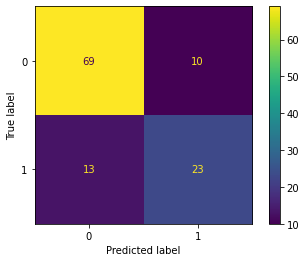

In [379]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_xgb, X_test, y_test)

#### Optimize Parameters using Cross Validation and GridSearch()
Some of these hyperparams include `max_depth`, the maximum tree depth, `learning_rate`, the learning rate, `gamma`, the paramater that encourages pruning, and `reg_lambda`, the regularization parameter. 

**Note**: since we have many hyperparams to optimize, we will use `GridSearchCV()`. We specify a bunch of potential values for the hyperparams and `GridSearchCV()` tests all possible combinations of the hyperparameters for us.

In [380]:
from sklearn.model_selection import GridSearchCV

## ROUND 1
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

grid_search_1 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', seed=42, subsample=0.9, colsample_bytree=0.5),
                             param_grid=param_grid, scoring='roc_auc', verbose=0, n_jobs=10, cv=3)

In [381]:
grid_search_1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=False)
print(grid_search_1.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 1.0, 'scale_pos_weight': 3}


Since `gamma`, `learning_rate` and `reg_lambda` were at the end of their ranges, we will increase the range to explore further.

In [382]:
## ROUND 2
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [1.0],
    'scale_pos_weight': [3]
}

grid_search_2 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', seed=42, subsample=0.9, colsample_bytree=0.5),
                             param_grid=param_grid, scoring='roc_auc', verbose=0, n_jobs=10, cv=3)
grid_search_2.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=False)
print(grid_search_2.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 1.0, 'scale_pos_weight': 3}


In [ ]:
## ROUND 3
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0],
    'reg_lambda': [10.0],
    'scale_pos_weight': [7, 8, 9]
}

grid_search_3 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', seed=42, subsample=0.9, colsample_bytree=0.5),
                             param_grid=param_grid, scoring='roc_auc', verbose=0, n_jobs=10, cv=3)
grid_search_3.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=False)
print(grid_search_3.best_params_)

#### Optimized XGBoost Model

In [441]:
clf_xgb = XGBClassifier(objective="binary:logistic", seed=42,
                       gamma = 0.25,
                       learning_rate = 0.1,
                       max_depth = 4,
                       reg_lambda = 1.0,
                       scale_pos_weight = 3,
                       subsample = 0.9,
                       colsample_bytree = 0.5)
clf_xgb.fit(X_train_prepared_df, y_train, 
            verbose=True, 
            early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.70570
[1]	validation_0-auc:0.76143
[2]	validation_0-auc:0.76477
[3]	validation_0-auc:0.77848
[4]	validation_0-auc:0.77866
[5]	validation_0-auc:0.78639
[6]	validation_0-auc:0.78692
[7]	validation_0-auc:0.78797
[8]	validation_0-auc:0.79852
[9]	validation_0-auc:0.81610
[10]	validation_0-auc:0.83228
[11]	validation_0-auc:0.83298
[12]	validation_0-auc:0.83052
[13]	validation_0-auc:0.83052
[14]	validation_0-auc:0.82419
[15]	validation_0-auc:0.81716
[16]	validation_0-auc:0.81786
[17]	validation_0-auc:0.81364
[18]	validation_0-auc:0.83052
[19]	validation_0-auc:0.83193
[20]	validation_0-auc:0.84072
[21]	validation_0-auc:0.83579
[22]	validation_0-auc:0.83087
[23]	validation_0-auc:0.82595
[24]	validation_0-auc:0.82700
[25]	validation_0-auc:0.82736
[26]	validation_0-auc:0.82208
[27]	validation_0-auc:0.82876
[28]	validation_0-auc:0.83263
[29]	validation_0-auc:0.83017
[30]	validation_0-auc:0.83509
[31]	validation_0-auc:0.82911
[32]	validation_0-auc:0.83087
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1.0,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

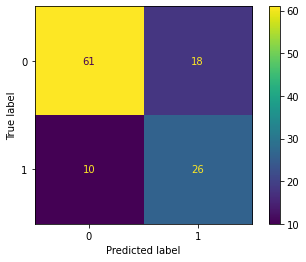

In [442]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_xgb, X_test, y_test)

In [443]:
# make predictions for test data
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.65%


In [402]:
import joblib

joblib.dump(clf_xgb, 'xgboost_model_6_more_symbols_no_imputation.pkl') # to save the model
#forest_loaded = joblib.load("forest_reg.pkl") # to load the model

['xgboost_model_6_more_symbols_no_imputation.pkl']

#### Visualise the tree

In [ ]:
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))
    
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
               condition_node_params=node_params,
               lead_node_params=leaf_params)

graph_data.view(filename='xgboost_tree')

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz

plot_tree(clf_xgb)
plt.show()

In [245]:
def feature_importances(clf, thresh):
    ## most important features
    important_features = []
    for i, x in enumerate(clf.feature_importances_):
        if x >= thresh:
            important_features.append([x, X_train.columns[i]])

    return important_features

feature_importances(clf_xgb, 0.02)

[[0.026190637, 'High__fft_coefficient__attr_"abs"__coeff_8'],
 [0.024507083, 'Low__fft_coefficient__attr_"abs"__coeff_52']]

In [415]:
df_var_imp = pd.DataFrame({"Variable": X_train.columns.values, "Importance": clf_xgb.feature_importances_}) \
                        .sort_values(by="Importance", ascending=False)
df_var_imp[:30]

,Variable,Importance
848,hwma_1h,0.021831
373,"Open__fft_coefficient__attr_""abs""__coeff_64",0.021143
683,"Close__fft_coefficient__attr_""imag""__coeff_44",0.018210
188,"Open__change_quantiles__f_agg_""var""__isabs_Tru...",0.015178
922,atr_1h,0.013851
130,"Open__fft_coefficient__attr_""abs""__coeff_16",0.012714
276,"Close__fft_coefficient__attr_""abs""__coeff_45",0.011892
17,"High__fft_coefficient__attr_""abs""__coeff_65",0.010137
59,High__abs_energy,0.009953
643,Low__quantile__q_0.8,0.009645


#### Learning Curve

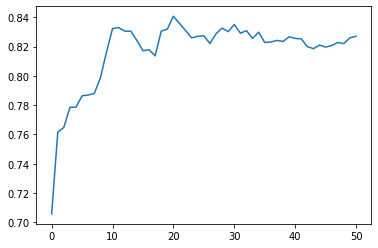

In [403]:
eval_results = clf_xgb.evals_result()
train_auc_tree = eval_results['validation_0']['auc']
plt.plot(train_auc_tree)
plt.show()

In [404]:
import sklearn.metrics as metrics

probs = clf_xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8407172995780591

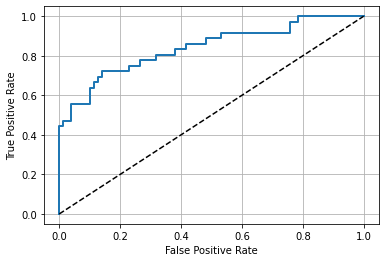

In [405]:
plot_roc_curve(fpr, tpr)

In [250]:
df_var_imp.loc[df_var_imp['Variable'].str.contains("kurtosis", case=False)]

,Variable,Importance
878,kurtosis_1h,0.004715
74,"Low__fft_aggregated__aggtype_""kurtosis""",0.000579
790,kurtosis,0.000000
234,"Close__fft_aggregated__aggtype_""kurtosis""",0.000000
240,"High__fft_aggregated__aggtype_""kurtosis""",0.000000
293,"Open__fft_aggregated__aggtype_""kurtosis""",0.000000


#### Cross-Validation: Scikit-Learn

In [406]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
xgb_scores_auc = cross_val_score(clf_xgb, X, y, cv=fold, scoring="roc_auc")

[12:11:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [407]:
print("ROC AUC Mean Score:", xgb_scores_auc.mean()*100)
print("ROC AUC Standard Dev:", xgb_scores_auc.std()*100, "%")

ROC AUC Mean Score: 79.39284160011292
ROC AUC Standard Dev: 1.8636640932905024 %


#### Cross-Validation: XGBoost

In [408]:
from xgboost import cv

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [417]:
params = {"objective":"binary:logistic", 'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 4, 'gamma': 0.25, 'reg_lambda': 1.0, 'scale_pos_weight': 3, "subsample": 0.9}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=30, metrics="auc", as_pandas=True, seed=42)

In [418]:
xgb_cv.tail()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
195,1.0,0.0,0.769694,0.029476
196,1.0,0.0,0.769694,0.029476
197,1.0,0.0,0.769737,0.029533
198,1.0,0.0,0.769778,0.029488
199,1.0,0.0,0.769819,0.029443


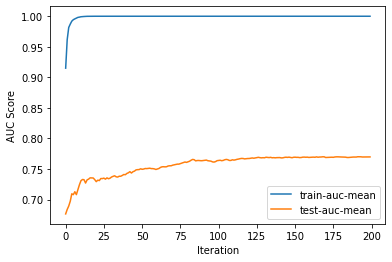

In [419]:
xgb_cv[["train-auc-mean", "test-auc-mean"]].plot()
plt.xlabel("Iteration")
plt.ylabel("AUC Score")
plt.show()

#### Feature Importances

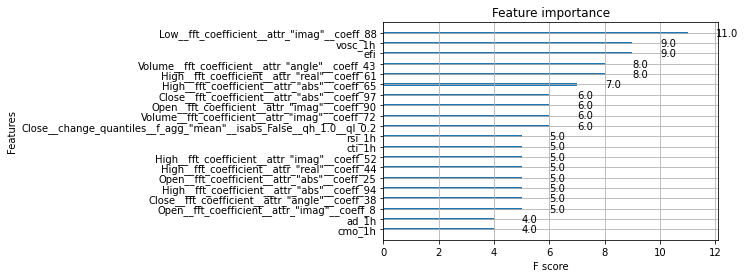

<Figure size 1152x864 with 0 Axes>

In [420]:
xgb.plot_importance(clf_xgb, max_num_features=20)
plt.figure(figsize = (16, 12))
plt.show()

In [413]:
y_train_pred_xgb = cross_val_predict(clf_xgb, X_train_prepared_df, y_train, cv=3)

[12:11:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [414]:
f1_score(y_train, y_train_pred_xgb)

0.5384615384615385

In [ ]:
y_probas_xgb = cross_val_predict(clf_xgb, X_train_prepared_df, y_train, cv=3, method="predict_proba")

In [ ]:
y_scores_xgb = y_probas_xgb[:,1] # score = probability of positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_scores_xgb)
plot_roc_curve(fpr_xgb, tpr_xgb, "XGBoost")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train, y_scores_xgb)